# Homework Assignment Notebook - Introduction to Quantum Programming

This notebook, containing all required deliverables, should be submitted for the introduction to quantum programming session homework assignment.

## Your Assignment:

After reviewing the [Classiq overview tutorial](https://docs.classiq.io/latest/explore/tutorials/basic_tutorials/the_classiq_tutorial/classiq_overview_tutorial/) and the related tutorials on [synthesis](https://docs.classiq.io/latest/explore/tutorials/basic_tutorials/the_classiq_tutorial/synthesis_tutorial/) and [execution](https://docs.classiq.io/latest/explore/tutorials/basic_tutorials/the_classiq_tutorial/execution_tutorial/), use the Classiq Python SDK with your preferred platform to:

1. Create a quantum algorithm that explicitly prepares a general `n`-qubit GHZ state:
  \begin{equation}
   |GHZ\rangle_8=\frac{1}{\sqrt{2}}|0\rangle^{\otimes n}+\frac{1}{\sqrt{2}}|1\rangle^{\otimes n}=\frac{1}{\sqrt{2}}|000\ldots\rangle+\frac{1}{\sqrt{2}}|111\ldots\rangle
  \end{equation}
    The GHZ state is a multi-qubit generalization of the Bell state for more than two qubits. To create the algorithm, implement a  function that iterates over all qubits and applies the necessary controlled operations, and a `main` function that initializes the qubits and prepares them for the operation of the function. After designing your algorithm, execute your code for 8 qubits to verify its correctness.



2. Synthesize nine distinct implementations of an Multi-Control-X (MCX) with $20$ control qubits and one target qubit, varying the `max width` constraint within the range $[22,30]$. For each implementation, optimize for minimal depth.

    Finally, plot the transpiled circuit depth as a function of the circuit width (the number of qubits used) for each width in the given range. Explain the results.



Your code and explanations should be included in the following section, which provides a step-by-step outline of what needs to be submitted.

## Your Solution:

Follow the instructions in the #TODO comments in each snippet and insert your code to ensure the algorithms run correctly and produce the desired outcomes.

1. Create your general GHZ algorithm following these steps.

Write your function here, leave the function name and signature as it is, and change the content of the function:

In [2]:
from classiq import *

@qfunc
def iterative_cx(reg: QArray):
    #X(reg[1]) #TODO: this is a placeholder operation so that the code in the notebook runs! change the contents to your contents!
    repeat(reg.len - 1, lambda i: CX(reg[i], reg[i+1]))


Implement your `main` function here, declaring and initializing the `QArray` variable `reg` with $8$ qubits, and performing any  necessary preparation operations before invoking the `iterative_cx` function (Note: Your implementation should be general for any number of qubits. The `reg` variable is initiated to $8$ qubits only to verify its correctness):

In [3]:
@qfunc
def main(reg: Output[QArray]):
    allocate(8, reg) # Allocation
    #TODO: add any preparation operations needed before invoking the function
    H(reg[0])
    iterative_cx(reg)

# Creating the model
qmod=create_model(main)

# Synthesizing the model into a quantum program
qprog = synthesize(create_model(main))
# Displaying the circuit using the IDE’s visualization tool
show(qprog)


Quantum program link: https://platform.classiq.io/circuit/31lv6DejdHx7yG7ivmagbSW1Imp


https://platform.classiq.io/circuit/31lv6DejdHx7yG7ivmagbSW1Imp?login=True&version=0.90.0

Finally, use this snippet to execute the obtained quantum program on the Classiq simulator (with the default number of shots $shots=2048$) to verify your code:

In [4]:
# Executing the quantum program
job = execute(qprog)

# Visualizing the measurements as a diagram in the IDE
job.open_in_ide()

# Retrieving the results as a nested data structure
res = job.get_sample_result()

# Extracting probabilities
counts = res.counts
probabilities = {key: value / 2048 for key, value in counts.items()}
print("Probabilities:", probabilities)

Probabilities: {'11111111': 0.48486328125, '00000000': 0.51513671875}


2. To implement the required optimized MCX circuits, start by developing an MCX algorithm configured for $20$ control qubits and $1$ target qubit

The `main` function below is a placeholder to ensure the subsequent code snippets run correctly. Update the function signature and contents to align with the required MCX algorithm.

In [5]:
@qfunc
def main(ctrl: Output[QArray], target: Output[QBit]): #TODO: Change the function signature to the required MCX algorithm
    #TODO: Change the function contents to the required MCX algorithm
    allocate(20, ctrl)
    allocate(target)
    control(ctrl, lambda: X(target))
    
qmod = create_model(main)

You can use the following code snippet as a starting point to extract the circuit depth and width for generating your plot:

In [6]:
import numpy as np

width=30 #TODO: Change the value to the desired max width constraint

# Setting constraints and optimization preferences on the circuit synthesis engine
qmod_with_constraints = set_constraints(qmod, Constraints(optimization_parameter="depth",max_width= width))

# Synthesizing into a quantum program and extracting the width and depth
quantum_program=synthesize(qmod_with_constraints)

# Extracting width and depth and printing
circuit_width = quantum_program.data.width
circuit_depth = quantum_program.transpiled_circuit.depth

print("Width=",circuit_width)
print("Depth=",circuit_depth)

widths = np.arange(22,31)

def create_circuit(w: int):
    constrnts=set_constraints(qmod, Constraints(optimization_parameter="depth",max_width=w))
    qprog=synthesize(constrnts)

    return [qprog.data.width,qprog.transpiled_circuit.depth]

results=[create_circuit(w) for w in widths]
print("Widths=",widths)
print("Results=",results)

Width= 30
Depth= 66
Widths= [22 23 24 25 26 27 28 29 30]
Results= [[22, 1877], [23, 1545], [24, 1269], [25, 1001], [26, 471], [27, 315], [28, 191], [29, 104], [30, 66]]


Use the `matplotlib` library to generate your plot, and include a markdown cell to explain your results after the plot.

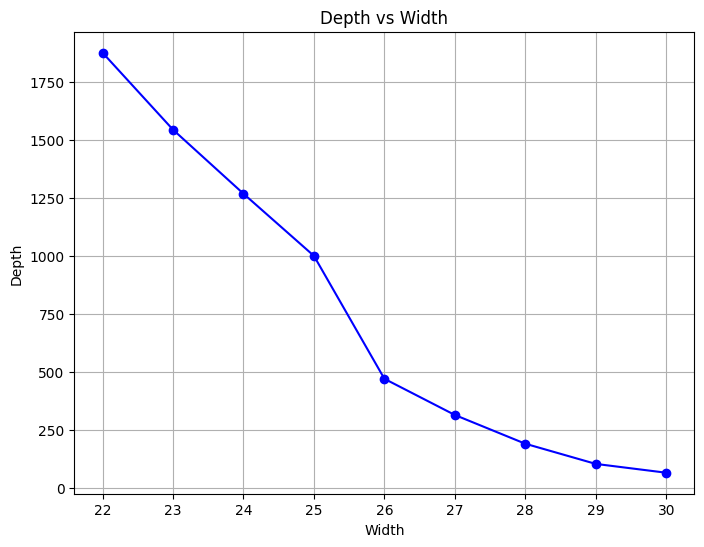

In [8]:
import matplotlib.pyplot as plt

# Extract x and y values
x = [item[0] for item in results]
y = [item[1] for item in results]

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'bo-')  # Blue circles connected by lines
plt.xlabel('Width')
plt.ylabel('Depth')
plt.title('Depth vs Width')
plt.grid(True)
plt.show()

If you have followed the steps in this section and every code snippet runs successfully, congratulations! you’re done.
Please upload this notebook via the submission form sent to you.